# 层次聚类示例代码

## 1. 层次聚类的简单实例:

想象我们有一组水果,包括苹果、香蕉和橙子。我们想根据它们的特征(如颜色、形状、大小)将它们分组。层次聚类会先将每个水果视为单独的类别,然后逐步合并最相似的类别,直到所有水果都在一个大类别中。

[[1.14901425 4.95852071]
 [1.19430656 5.45690896]
 [0.92975399 4.92975891]
 [1.47376384 5.23023042]
 [0.85915768 5.16276801]
 [0.86097469 4.86028107]
 [1.07258868 4.42601593]
 [0.48252465 4.83131374]
 [0.69615066 5.0942742 ]
 [0.72759278 4.57630889]
 [1.43969463 4.93226711]
 [1.02025846 4.57257554]
 [0.83668518 5.03327678]
 [0.65470193 5.11270941]
 [0.81980839 4.91249188]]
[[1.81948802 7.55568346]
 [1.99595083 6.68268672]
 [2.24676347 6.63374691]
 [2.06265908 6.41209896]
 [1.60154419 7.05905837]
 [2.22153997 7.05141048]
 [1.96530552 6.90966889]
 [1.5564434  6.78404674]
 [1.86180837 7.31713667]
 [2.10308549 6.47108795]
 [2.09722519 6.88447532]
 [1.7969234  7.18350289]
 [2.30929986 7.27938404]
 [1.74823474 6.90723629]
 [2.09937903 7.29266354]]
[[2.85624773 4.94430231]
 [2.66809951 4.64113801]
 [3.24375775 5.40687201]
 [2.97839696 5.30105987]
 [3.10849081 4.80646407]
 [3.10841868 5.46141097]
 [2.98925219 5.4693931 ]
 [2.21407647 5.24657075]
 [3.02611412 4.91029779]
 [3.02752823 4.40372933

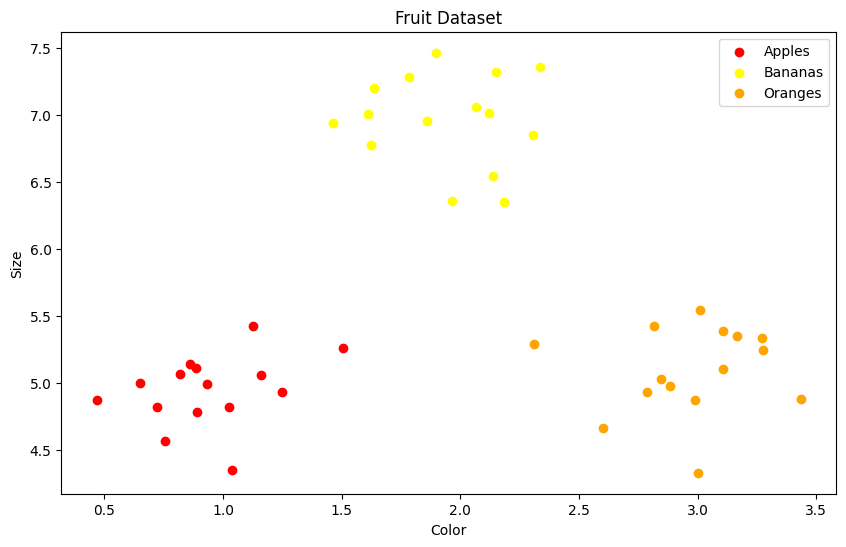

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 生成数据集
np.random.seed(42)
n_samples = 15

# 苹果: 红色(1)、中等大小
apples = np.random.normal(loc=[1, 5], scale=0.3, size=(n_samples, 2))
print(apples)

# 香蕉: 黄色(2)、较大
bananas = np.random.normal(loc=[2, 7], scale=0.3, size=(n_samples, 2))
print(bananas)

# 橙子: 橙色(3)、中等大小
oranges = np.random.normal(loc=[3, 5], scale=0.3, size=(n_samples, 2))
print(oranges)

# 合并数据集
X = np.vstack((apples, bananas, oranges))

# 添加一些随机噪声
X += np.random.normal(scale=0.1, size=X.shape)

# 绘制数据点
plt.figure(figsize=(10, 6))
plt.scatter(X[:n_samples, 0], X[:n_samples, 1], c='red', label='Apples')
plt.scatter(X[n_samples:2*n_samples, 0], X[n_samples:2*n_samples, 1], c='yellow', label='Bananas')
plt.scatter(X[2*n_samples:, 0], X[2*n_samples:, 1], c='orange', label='Oranges')
plt.xlabel('Color')
plt.ylabel('Size')
plt.legend()
plt.title('Fruit Dataset')
plt.show()

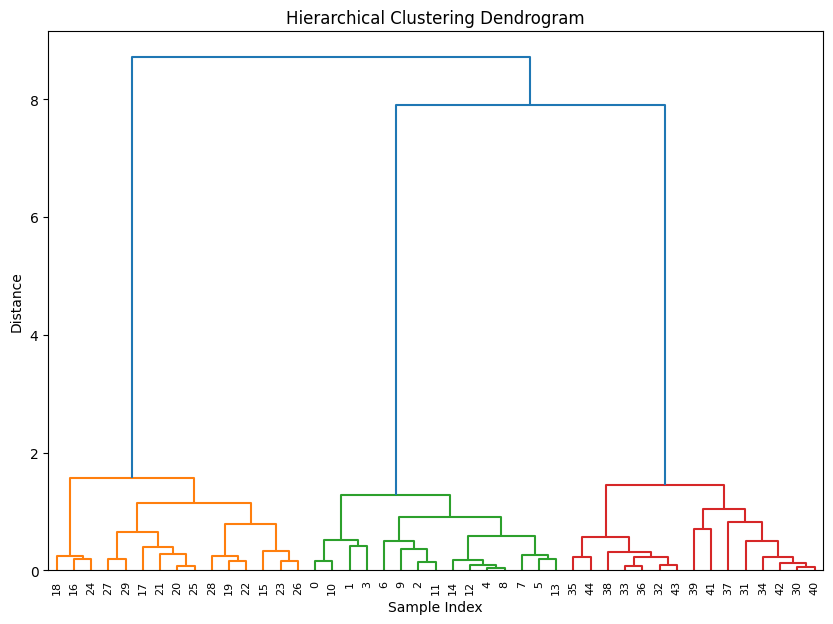

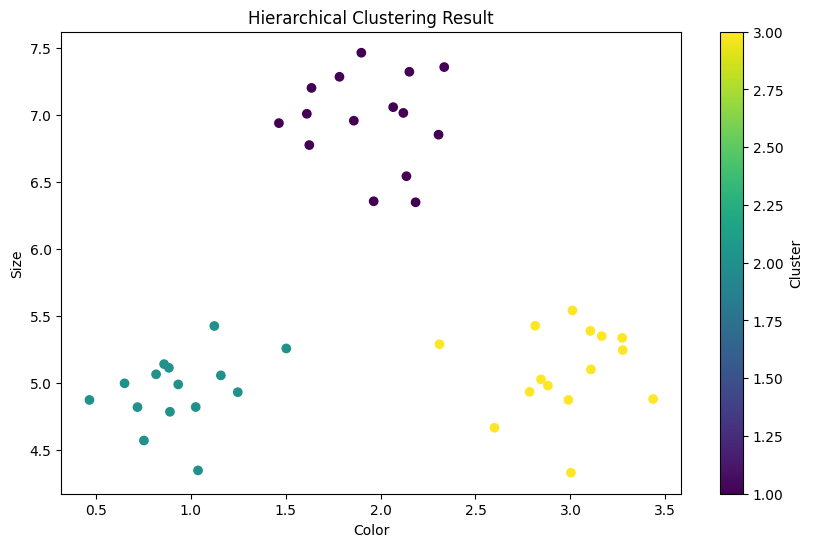

In [7]:
# 执行层次聚类
Z = linkage(X, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 从树状图中选择簇的数量(例如,我们知道有3种水果)
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=3, criterion='maxclust')

# 绘制聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Color')
plt.ylabel('Size')
plt.title('Hierarchical Clustering Result')
plt.colorbar(label='Cluster')
plt.show()